# Business Understanding

Pada tahap ini membutuhkan pengetahuan dari objek bisnis, dengan membangun atau mendapatkan data dan menyamakan tujuan pemodelan untuk tujuan bisnis sehingga model akan dibangun dengan baik. 
Tentang kasus ini :

Kanker payudara adalah kanker paling umum di kalangan wanita di dunia. Itu menyumbang 25% dari semua kasus kanker, dan mempengaruhi lebih dari 2,1 Juta orang pada tahun 2015 saja. Itu dimulai ketika sel-sel di payudara mulai tumbuh di luar kendali. Sel-sel ini biasanya membentuk tumor yang bisa dilihat melalui sinar-X atau terasa seperti benjolan di area payudara.

Tantangan utama terhadap pendeteksiannya adalah bagaimana mengklasifikasikan tumor menjadi ganas (kanker) atau jinak (non kanker). Melakukan analisis pengklasifikasian tumor ini menggunakan LogisticRegression dan dan mesin vektor dukungan (SVM), dan Keakuratan model akan dievaluasi.

Kumpulan data ini telah dirujuk dari Kaggle.

Objektif:
Pahami Dataset & pembersihan (jika diperlukan).
Bangun model klasifikasi untuk memprediksi apakah jenis kanker itu Ganas atau Jinak.
Sempurnakan juga hyperparameter & bandingkan metrik evaluasi dari berbagai algoritme klasifikasi.

Link : https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

# Data Understanding

Pada tahap ini merupakan  dipakai untuk memeriksa data sehingga dapat mengidentifikasi masalah pada data yang kita dapatkan. Tahapan ini memberikan pondasi analitik untuk sebuah penelitian dengan membuat ringkasan (summary) dan mengidentifikasi potensi masalah dalam data.

Dataset terdiri dari 32 Variabel

 0.   id (Unique ID) = int64  
 1.   diagnosis (Target: M - Ganas B - Jinak) = object 
 2.   radius_mean (Radius Lobus) = float64
 3.   texture_mean (Rata-rata Tekstur Permukaan) = float64
 4.   perimeter_mean (Rata-rata  Perimeter Luar Lobus) = float64
 5.   area_mean (Rata-rata Luas Lobus) = float64
 6.   smoothness_mean (Rata-rata Tingkat Kehalusan) = float64
 7.   compactness_mean (Rata-rata Kekompakan) =  float64
 8.   concavity_mean   (Rata-rata Cekung) = float64
 9.   concave points_mean (Rata-rata Poin cekung) = float64
 10.  symmetry_mean (Rata-rata simetri) =float64
 11.  fractal_dimension_mean (Rata-rata dimensi fraktal) = float64
 12.  radius_se (Standard error radius Lobus) = float64
 13.  texture_se (Standard error Tekstur Permukaan) = float64
 14.  perimeter_se (Standard error perimeter Luar Lobus) = float64
 15.  area_se     (Standard error Luas Lobus) = float64
 16.  smoothness_se  (Standard error Tingkat Kehalusan) = float64
 17.  compactness_se  (Standard error Kekompakan) = float64
 18.  concavity_se    (Standard error Cekung) = float64
 19.  concave points_se (Standard error poin cekung) = float64
 20.  symmetry_se (Standard error Simetri) = float64
 21.  fractal_dimension_se  (Standard error dimensi fraktal) = float64
 22.  radius_worst (Nilai terburuk radius) = float64
 23.  texture_worst (Nilai terburuk tekstur permukaan) = float64
 24.  perimeter_worst (Nilai terburuk perimeter luar lobus) = float64
 25.  area_worst  (Nilai terburuk luas lobus) = float64
 26.  smoothness_worst (Nilai terburuk tingkat kehalusan) = float64
 27.  compactness_worst (Nilai terburuk kekompakan) = float64
 28.  concavity_worst  (Nilai terburuk Cekung) = float64
 29.  concave points_worst (Nilai terburuk poin cekung) = float64
 30.  symmetry_worst (Nilai terburuk simetri) = float64
 31.  fractal_dimension_worst (Nilai terburuk dimensi fraktal) = float64


## Tentukan library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn import svm

## Load dataset

Mengambil dan melihat kasus dari 10 data pertama

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.shape

(569, 32)

### Data Struktur

Berdasarkan output di bawah ini, dataset telah menampilkan informasi struktural yang berupa nama fitur, berapa jumlah data yang non-null, serta tipe data yang digunakan. Terlihat bahwa terdapat 30 fitur dalam dataset, dimana untuk setiap fitur yang tidak memiliki data non-null yang artinya dataset ini tidak mengandung data null. Dapat terlihat pula bahwa dataset ini menggunakan tipe data float64 pada ke 30 fiturnya

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Menghapus Variabel id pada data

In [7]:
df.drop("id", axis=1, inplace=True)

Mengambil sampel data secara acak terdapat 32 kolom 1 baris

In [8]:
df.sample()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
440,B,10.97,17.2,71.73,371.5,0.08915,0.1113,0.09457,0.03613,0.1489,...,12.36,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.1555,0.254,0.09532


Berisi nilai yang terdiri dari M - Malignant B - Benign,  maka metode ini akan menghitung dan mengembalikan jumlah kemunculan dari masing masing nilai tersebut

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Lb = LabelEncoder() adalah kode yang digunakan untuk menginisialisasi objek dari kelas LabelEncoder pada library sklearn.preprocessing. LabelEncoder digunakan untuk mengubah nilai kategorikal menjadi nilai numerik. Dalam kode tersebut, objek Lb akan digunakan untuk mengubah nilai pada kolom tertentu pada sebuah dataframe menjadi nilai numerik.

In [10]:
Lb = LabelEncoder ()

In [11]:
df['diagnosis']  = Lb.fit_transform(df['diagnosis'])

df['diagnosis'].unique() adalah sebuah perintah Python yang digunakan untuk mengambil nilai unik dari kolom 'diagnosis' di dalam DataFrame 'df'. Nilai unik tersebut akan dihasilkan dalam bentuk array/list.

In [12]:
df['diagnosis'].unique()

array([1, 0])

In [13]:
df.head(25)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [14]:
df.drop_duplicates()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Visualisasi

Visualisasi adalah cara untuk menyajikan data atau informasi dalam bentuk grafik, diagram, atau plot sehingga lebih mudah dipahami oleh manusia. Tujuannya adalah untuk membantu memahami data secara intuitif dan cepat, serta memudahkan pengambilan keputusan atau analisis. Dengan menggunakan visualisasi, kita dapat dengan mudah menemukan pola, tren, dan hubungan dalam data yang mungkin sulit untuk ditemukan hanya dengan melihat data mentah.

Heatmap menunjukkan nilai-nilai kosong dengan warna yang berbeda, sehingga memungkinkan kita untuk dengan mudah melihat pola kekosongan dalam dataset kita. Semakin gelap warna pada heatmap, semakin banyak nilai null pada kolom dan baris yang sesuai.

<Axes: >

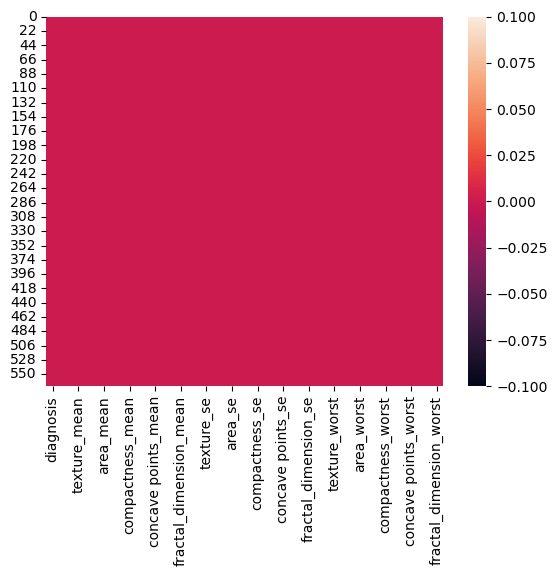

In [15]:
sns.heatmap(df.isnull())

Membuat sebuah figure baru dengan lebar 20 inch dan tinggi 10 inch. Ini berguna untuk membuat gambar dengan ukuran yang spesifik sehingga mudah dibaca dan dianalisis.

<Axes: >

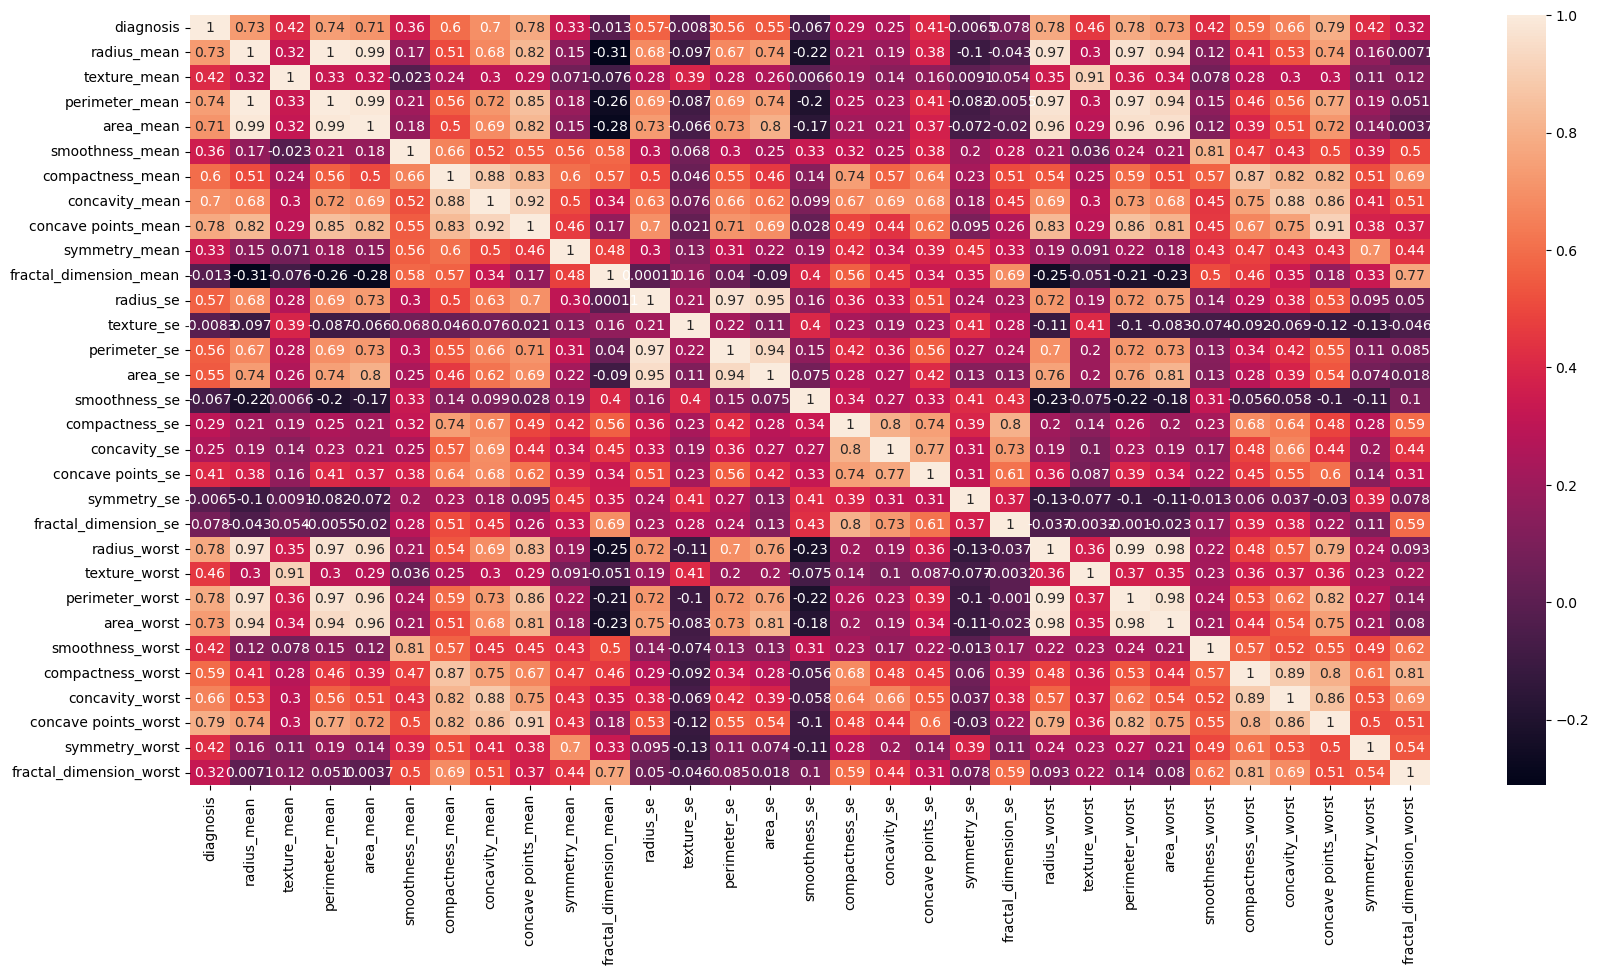

In [17]:
#tunjukkan koefisien korelasi
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)


# Data preparation

Pada tahap ini, Data preparation atau persiapan data adalah proses mempersiapkan data mentah (raw data) sebelum diolah lebih lanjut dengan menggunakan algoritma atau teknik tertentu. Tujuan dari data preparation adalah untuk memastikan data yang akan diolah sudah bersih, terstruktur dengan baik, dan siap untuk digunakan.


In [18]:
# Memeriksa nilai null dalam dataset
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Memisahkan data atribut dengan label

Pada kode tersebut, X berisi dataframe data setelah kolom 'diagnosis' dihapus menggunakan method drop dan parameter columns='diagnosis' yang menandakan kolom yang akan dihapus dan axis=1 yang menandakan bahwa yang dihapus adalah kolom. Sementara itu, Y berisi kolom 'diagnosis' dari dataframe data. Dalam konteks machine learning, X adalah fitur-fitur yang digunakan untuk melakukan prediksi pada target variabel Y.

In [19]:
#Memisahkan data dan label
X = df.drop(columns='diagnosis', axis=1)
Y = df['diagnosis']

### Melihat Variabel data

In [20]:
print (X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [21]:
print (Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


### Standarisasi Data 

Standarisasi data adalah salah satu teknik pra-pemrosesan data yang umum digunakan dalam pemodelan statistik dan machine learning. Tujuan dari standarisasi adalah untuk mengubah distribusi data sehingga memiliki nilai mean (rata-rata) 0 dan standard deviation (standar deviasi) 1.

StandardScaler adalah salah satu metode normalisasi data yang umum digunakan dalam pemrosesan data sebelum melakukan pemodelan. Normalisasi dilakukan untuk mengubah skala data menjadi lebih seragam dan memungkinkan model untuk belajar lebih efektif. 

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler()

Pada kode tersebut, scaler adalah objek StandardScaler yang telah dibuat sebelumnya dengan cara scaler = StandardScaler(). Kemudian, untuk melakukan standarisasi pada dataset X, digunakan method transform() pada objek scaler. Proses standarisasi dilakukan dengan mengurangi setiap nilai pada dataset X dengan rata-rata (mean) dari seluruh data dan kemudian membaginya dengan standar deviasi.

In [24]:
standarized_data = scaler.transform(X)

In [25]:
print(standarized_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [26]:
X = standarized_data
Y = df['diagnosis']

In [27]:
print (X)
print (Y)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


### Memisahkan Data Training dan Data Testing

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


# Modeling

Pada tahap ini, merupakan tahap pengembangan model machine learning. Tahap ini melibatkan pemilihan algoritma, konfigurasi parameter, dan pembuatan model.

tahap penting dalam membangun model machine learning. Pada tahap ini, kita melakukan pemilihan algoritma dan konfigurasi parameter yang sesuai dengan tujuan bisnis dan data yang digunakan. Setelah model dibangun, kita akan mengevaluasi performa model dan menentukan apakah model tersebut cukup baik untuk diterapkan di dalam produksi (Deployment).

Model LogisticRegression() adalah salah satu model pembelajaran mesin yang digunakan untuk masalah klasifikasi biner (dua kelas). Model ini bekerja dengan menghitung probabilitas dari suatu data untuk masuk ke dalam salah satu kelas yang diinginkan, yaitu kelas 0 atau kelas 1. Kemudian model akan mengambil keputusan berdasarkan probabilitas tersebut.

In [42]:
model=LogisticRegression()

Dalam kanker payudara, model LogisticRegression() dapat digunakan untuk memprediksi apakah suatu tumor bersifat jinak (kelas 0) atau ganas (kelas 1) berdasarkan fitur-fitur yang diberikan. Model ini cocok digunakan pada dataset dengan fitur yang berkorelasi atau tidak independen.

In [43]:
model.fit(X_train, Y_train)

LogisticRegression()

Pada kode tersebut, objek classifier dibuat dengan menggunakan algoritma Support Vector Machine (SVM) dan kernel linear. SVM adalah algoritma pembelajaran mesin yang digunakan untuk klasifikasi dan regresi. Kernel linear adalah jenis kernel SVM yang paling sederhana dan paling sering digunakan. Kernel ini menghitung produk titik antara dua vektor dalam ruang fitur dan digunakan untuk memisahkan dua kelas dengan garis lurus.

In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Evaluasi

### Membuat model evaluasi untuk mengukur tingkat akurasi

Evaluasi adalah proses pencatatan hasil pembelajaran menggunakan metrik evaluasi yang berbeda untuk memahami kinerja model. Evaluasi model juga berperan dalam pemantauan dan pemilihan model terbaik dengan melihat score dari data test dan data train masing-masing algoritma.

In [34]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Fungsi accuracy_score() adalah fungsi pengukuran evaluasi klasifikasi yang digunakan untuk menghitung akurasi prediksi kelas. Fungsi ini membandingkan nilai prediksi dengan nilai target asli dan mengembalikan proporsi sampel yang diprediksi dengan benar. Hasil perhitungan akurasi disimpan pada variabel training_data_accuracy. Hasil akurasi ini digunakan untuk mengevaluasi sejauh mana model yang telah dilatih dapat melakukan prediksi dengan benar pada data training.






In [35]:
print('Akurasi data training = ', training_data_accuracy)

Akurasi data training =  0.989010989010989


Mendapatkan akurasi data training = 0.989010989010989
artinya model dapat menjelaskan 98% dari variasi data.

In [36]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print ('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.9736842105263158


Mendapatkan akurasi data testing = 0.9736842105263158
artinya model dapat menjelaskan 97% dari variasi data.

### Membuat Model Prediksi

In [47]:
input_data = (17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1 ):
    print('Pasien terkena Kanker Payudara (Ganas)')
else :
    print('Pasien terkena Kanker Payudara (Jinak) ')
    

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]
[1]
Pasien terkena Kanker Payudara (Ganas)


### Simpan Model

In [40]:
import pickle

In [41]:
filename = 'breast_cancer_model.sav'
pickle.dump(classifier, open(filename,'wb'))

# Deployment

Pada tahap ini, melakukan deployment pengetahuan atau informasi yang telah akan diatur dan dipresentasikan menggunakan Streamlit. 
Streamlit adalah sebuah framework berbasis Python dan bersifat open-source yang dibuat untuk memudahkan dalam membangun aplikasi web di bidang sains data dan machine learning yang interaktif.
 link Streamlit Share di serahkan pada saat pengumpulan
